In [2]:
import pygame
import numpy as np
import sys
import matplotlib.pyplot as plt

pygame 2.4.0 (SDL 2.26.4, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Define dimensions of the maze
dim = 5
maze = np.zeros((dim,dim))

# Define number of walls
num_of_walls = 10

#Select random walls
for i in range(num_of_walls):
    a,b = np.random.random_integers(1,dim-2,2)
    maze[a,b] = 1

# Define border of maze
#maze[0,:] = 2
#maze[dim-1,:] = 2
#maze[:,0] = 2
#maze[:,dim-1] = 2

# Define the goal state
maze[dim-1, dim-1] = 2
goal_state = (dim-1, dim-1)
print(maze)

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 2.]]


<ipython-input-3-6ed21d3955f8>:10: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  a,b = np.random.random_integers(1,dim-2,2)


In [4]:
# Define the actions and their corresponding changes in position
actions = ['up', 'down', 'left', 'right']
action_deltas = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [5]:
# Initialize the Q-matrix with zeros
Q = np.zeros((maze.shape[0], maze.shape[1], 4))

# Define the rewards for each state
rewards = {
    0: -1,   # Maze cell
    1: -2,   # Wall
    2: 10    # Goal
}

In [6]:
# Define a function to choose an action using the epsilon-greedy policy
def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        # Choose a random action
        return actions[np.random.randint(0, len(actions))]
    else:
        # Choose the action with the highest Q-value
        return actions[np.argmax(Q[state[0], state[1]])]

In [7]:
# Define a function to update the Q-value using SARSA
def update_q_value(state, action, reward, next_state, next_action, alpha, gamma):
    # Calculate the TD error
    td_error = reward + gamma * Q[next_state[0], next_state[1], actions.index(next_action)] - Q[state[0], state[1], actions.index(action)]
    
    # Update the Q-value for the current state and action
    Q[state[0], state[1], actions.index(action)] += alpha * td_error

In [8]:
#Define the colors to use
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
YELLOW = (255,255,0)

In [9]:
# Define a function to simulate an episode
def run_episode(alpha, gamma, epsilon, training=True):
    # Choose a random starting state that is not the goal state
    state = (np.random.randint(0, maze.shape[0]), np.random.randint(0, maze.shape[1]))

    while state == goal_state:
        state = (np.random.randint(0, maze.shape[0]), np.random.randint(0, maze.shape[1]))
    
    init = state
    
    if training == False:
        # Clear the screen
        screen.fill(WHITE)

        # Draw the maze and the goal
        for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):
                rect = pygame.Rect(j*cell_size, i*cell_size, cell_size, cell_size)
                if i == init[0] and j == init[1]: #Start cell
                    pygame.draw.rect(screen, YELLOW, rect)
                    pygame.draw.circle(screen, RED, (state[1]*cell_size+25,state[0]*cell_size+25), 5)
                elif maze[i,j] == 0:  # Maze cell
                    pygame.draw.rect(screen, BLACK, rect)
                elif maze[i,j] == 1:  #Wall
                    pygame.draw.rect(screen, BLUE, rect)
                elif maze[i,j] == 2: #Goal
                    pygame.draw.rect(screen, GREEN, rect)
    
    # Choose the first action using an epsilon-greedy policy
    action = choose_action(state, epsilon)
    
    # Initialize the total reward
    total_reward = 0
    
    # Repeat until the goal state is reached
    while state != goal_state:
        # Move to the next state
        delta = action_deltas[actions.index(action)]
        next_state = (state[0]+delta[0], state[1]+delta[1])
        
        # If the next state is outside the maze, set it to the current state
        if next_state[0] < 0 or next_state[0] >= maze.shape[0] or next_state[1] < 0 or next_state[1] >= maze.shape[1]:
            next_state = state
            # Update reward as the action taken hit the border of the wall
            total_reward += rewards[1]
        
        # Get the reward for the next state
        reward = rewards[maze[next_state[0], next_state[1]]]
    
        # Update the Q-value using SARSA
        next_action = choose_action(next_state, epsilon)
        if training == True:
            update_q_value(state, action, reward, next_state, next_action, alpha, gamma)

        # Update the total reward and current state and action
        total_reward += reward
        state = next_state
        action = next_action
        
        if training == False:
            # Draw the current state of the agent
            for i in range(maze.shape[0]):
                for j in range(maze.shape[1]):
                    if i == state[0] and j == state[1]: #Next cell
                        pygame.draw.circle(screen, RED, (state[1]*cell_size+25,state[0]*cell_size+25), 5)

    return total_reward

In [11]:
# Train the agent for the specified number of episodes
alpha = 0.5
gamma = 0.9
epsilon = 0.2
for i in range(100):
    total_reward = run_episode(alpha, gamma, epsilon)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")

Episode 1: Total Reward = -308
Episode 2: Total Reward = -44
Episode 3: Total Reward = 9
Episode 4: Total Reward = 9
Episode 5: Total Reward = -53
Episode 6: Total Reward = -9
Episode 7: Total Reward = -37
Episode 8: Total Reward = 2
Episode 9: Total Reward = 7
Episode 10: Total Reward = -17
Episode 11: Total Reward = 7
Episode 12: Total Reward = 8
Episode 13: Total Reward = 8
Episode 14: Total Reward = -18
Episode 15: Total Reward = 6
Episode 16: Total Reward = 4
Episode 17: Total Reward = 2
Episode 18: Total Reward = 6
Episode 19: Total Reward = 7
Episode 20: Total Reward = 6
Episode 21: Total Reward = 2
Episode 22: Total Reward = 6
Episode 23: Total Reward = -1
Episode 24: Total Reward = 5
Episode 25: Total Reward = 7
Episode 26: Total Reward = -34
Episode 27: Total Reward = 5
Episode 28: Total Reward = 1
Episode 29: Total Reward = 9
Episode 30: Total Reward = 0
Episode 31: Total Reward = 5
Episode 32: Total Reward = 2
Episode 33: Total Reward = 1
Episode 34: Total Reward = 10
Episo

In [13]:
#Initialize Pygame
pygame.init()

#Define the size of each cell in the maze and the size of the window
cell_size = 50
window_size = (maze.shape[1]*cell_size, maze.shape[0]*cell_size)

#Create the window
screen = pygame.display.set_mode(window_size)
pygame.display.set_caption("Maze")
clock = pygame.time.Clock()

# Test the agent for the specified number of episodes
for i in range(10):
    total_reward = run_episode(alpha, gamma, epsilon, training=False)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")
    
    # Update the Pygame window
    pygame.display.flip()
    
    # Pause briefly to allow the user to see the visualization
    pygame.time.wait(3000)

# Wait for the user to close the Pygame window
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

Episode 1: Total Reward = -51
Episode 2: Total Reward = 19
Episode 3: Total Reward = -18
Episode 4: Total Reward = 9
Episode 5: Total Reward = -19
Episode 6: Total Reward = 0
Episode 7: Total Reward = 19
Episode 8: Total Reward = -2
Episode 9: Total Reward = 10
Episode 10: Total Reward = -6


SystemExit: 

C:\Users\aditi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


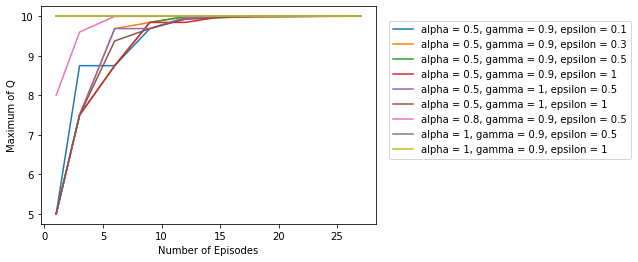

In [12]:
num_of_episodes = np.arange(0,30,3)
num_of_episodes[0] = 1
max_Q = np.zeros(len(num_of_episodes), dtype=float)

alpha = [0.5,0.5,0.5,0.5,0.5,0.5,0.8,1,1]
gamma = [0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9]
epsilon = [0.1,0.3,0.5,1,0.5,1,0.5,0.5,1]

plt.figure()
for m in range(len(alpha)):
    for i in range(len(num_of_episodes)):
        # Initialize the Q-matrix with zeros
        Q = np.zeros((maze.shape[0], maze.shape[1], 4))

        # Train the agent for the specified number of episodes
        for j in range(num_of_episodes[i]):
            _ = run_episode(alpha[m], gamma[m], epsilon[m], training=True)

        #Get maximum value of Q
        max_Q[i] = Q.max()
    plt.plot(num_of_episodes, max_Q, label = 'alpha = {}, gamma = {}, epsilon = {}'.format(alpha[m], gamma[m], epsilon[m]))

plt.legend(loc=(1.04,0.3))
plt.xlabel('Number of Episodes')
plt.ylabel('Maximum of Q')
plt.show()

### Few points about hyperparameters

Google DeepMind used a decaying ε-greedy action selection. Where ε decays over time from 1 to 0.1 — in the beginning, the system makes completely random moves to explore the state space maximally, and then it settles down to a fixed exploration rate.


α: (the learning rate) should decrease as you continue to gain a larger and larger knowledge base. The learning rate should be in the range of 0 -1. The higher the learning rate, it quickly replaces the new q value. We need to optimize it in a way so that our agent learns from the previous q values. A learning rate is a tool that can be used to find how much we keep our previous knowledge of our experience that needs to keep for our state-action pairs.
γ: as you get closer and closer to the deadline, your preference for near-term reward should increase, as you won’t be around long enough to get the long-term reward, which means your gamma should decrease.
ϵ: as we develop our strategy, we have less need for exploration and more exploitation to get more utility from our policy, so as trials increase, epsilon should decrease.

In [10]:
# Define a function to simulate an episode for a closed maze
def run_episode_closed_maze(alpha, gamma, epsilon, training=True):
    # Choose a random starting state that is not the goal state
    state = (np.random.randint(0, maze.shape[0]), np.random.randint(0, maze.shape[1]))

    while state == goal_state:
        state = (np.random.randint(0, maze.shape[0]), np.random.randint(0, maze.shape[1]))
    
    init = state
    
    if training == False:
        # Clear the screen
        screen.fill(WHITE)

        # Draw the maze and the goal
        for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):
                rect = pygame.Rect(j*cell_size, i*cell_size, cell_size, cell_size)
                if i == init[0] and j == init[1]: #Start cell
                    pygame.draw.rect(screen, YELLOW, rect)
                    pygame.draw.circle(screen, RED, (state[1]*cell_size+25,state[0]*cell_size+25), 5)
                elif maze[i,j] == 0:  # Maze cell
                    pygame.draw.rect(screen, BLACK, rect)
                elif maze[i,j] == 1:  #Wall
                    pygame.draw.rect(screen, BLUE, rect)
                elif maze[i,j] == 2: #Goal
                    pygame.draw.rect(screen, GREEN, rect)
    
    # Choose the first action using an epsilon-greedy policy
    action = choose_action(state, epsilon)
    
    # Initialize the total reward
    total_reward = 0
    
    # Repeat until the goal state is reached
    while state != goal_state:
        # Move to the next state
        delta = action_deltas[actions.index(action)]
        next_state = (state[0]+delta[0], state[1]+delta[1])
        
        # If the next state is outside the maze, set it to the closed loop state
        if next_state[0] < 0:
            print('Before looping-',next_state)
            x = dim-1
            y = next_state[1]
            next_state = (x,y)
            print('After looping-',next_state)
        elif next_state[0] >= maze.shape[0]:
            print('Before looping-',next_state)
            x = 0
            y = next_state[1]
            next_state = (x,y)
            print('After looping-',next_state)
        elif next_state[1] < 0:
            print('Before looping-',next_state)
            x = next_state[0]
            y = dim-1
            next_state = (x,y)
            print('After looping-',next_state)
        elif next_state[1] >= maze.shape[1]:
            print('Before looping-',next_state)
            x = next_state[0]
            y = 0
            next_state = (x,y)
            print('After looping-',next_state)
        
        # Get the reward for the next state
        reward = rewards[maze[next_state[0], next_state[1]]]
    
        # Update the Q-value using SARSA
        next_action = choose_action(next_state, epsilon)
        if training == True:
            update_q_value(state, action, reward, next_state, next_action, alpha, gamma)

        # Update the total reward and current state and action
        total_reward += reward
        state = next_state
        action = next_action
        
        if training == False:
            # Draw the current state of the agent
            for i in range(maze.shape[0]):
                for j in range(maze.shape[1]):
                    if i == state[0] and j == state[1]: #Next cell
                        pygame.draw.circle(screen, RED, (state[1]*cell_size+25,state[0]*cell_size+25), 5)

    return total_reward

In [11]:
# Train the agent for the specified number of episodes
alpha = 0.5
gamma = 0.9
epsilon = 0.2

for i in range(100):
    total_reward = run_episode_closed_maze(alpha, gamma, epsilon)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")

Before looping- (-1, 1)
After looping- (4, 1)
Before looping- (5, 1)
After looping- (0, 1)
Before looping- (-1, 0)
After looping- (4, 0)
Before looping- (5, 0)
After looping- (0, 0)
Before looping- (2, -1)
After looping- (2, 4)
Before looping- (-1, 4)
After looping- (4, 4)
Episode 1: Total Reward = -14
Before looping- (4, -1)
After looping- (4, 4)
Episode 2: Total Reward = 9
Before looping- (1, -1)
After looping- (1, 4)
Before looping- (-1, 3)
After looping- (4, 3)
Episode 3: Total Reward = -2
Before looping- (-1, 2)
After looping- (4, 2)
Before looping- (0, -1)
After looping- (0, 4)
Before looping- (0, 5)
After looping- (0, 0)
Before looping- (5, 2)
After looping- (0, 2)
Before looping- (1, 5)
After looping- (1, 0)
Before looping- (-1, 0)
After looping- (4, 0)
Before looping- (4, -1)
After looping- (4, 4)
Episode 4: Total Reward = -36
Before looping- (3, -1)
After looping- (3, 4)
Episode 5: Total Reward = 6
Before looping- (-1, 4)
After looping- (4, 4)
Episode 6: Total Reward = 2
Befo

In [12]:
#Initialize Pygame
pygame.init()

#Define the size of each cell in the maze and the size of the window
cell_size = 50
window_size = (maze.shape[1]*cell_size, maze.shape[0]*cell_size)

#Create the window
screen = pygame.display.set_mode(window_size)
pygame.display.set_caption("Maze")
clock = pygame.time.Clock()

# Test the agent for the specified number of episodes
for i in range(10):
    total_reward = run_episode_closed_maze(alpha, gamma, epsilon, training=False)
    
    # Print the total reward for the episode
    print(f"Episode {i+1}: Total Reward = {total_reward}")
    
    # Update the Pygame window
    pygame.display.flip()
    
    # Pause briefly to allow the user to see the visualization
    pygame.time.wait(3000)

# Wait for the user to close the Pygame window
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

Before looping- (4, -1)
After looping- (4, 4)
Episode 1: Total Reward = 8
Before looping- (-1, 4)
After looping- (4, 4)
Episode 2: Total Reward = 10
Before looping- (-1, 1)
After looping- (4, 1)
Before looping- (4, -1)
After looping- (4, 4)
Episode 3: Total Reward = 2
Episode 4: Total Reward = 8
Before looping- (-1, 0)
After looping- (4, 0)
Before looping- (4, -1)
After looping- (4, 4)
Episode 5: Total Reward = 7
Before looping- (5, 3)
After looping- (0, 3)
Before looping- (-1, 3)
After looping- (4, 3)
Episode 6: Total Reward = 7
Before looping- (-1, 0)
After looping- (4, 0)
Before looping- (4, -1)
After looping- (4, 4)
Episode 7: Total Reward = 7
Episode 8: Total Reward = 10
Before looping- (-1, 0)
After looping- (4, 0)
Before looping- (4, -1)
After looping- (4, 4)
Episode 9: Total Reward = 6
Before looping- (-1, 3)
After looping- (4, 3)
Episode 10: Total Reward = 7


SystemExit: 

C:\Users\aditi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
